### Importing Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings("ignore")


### Importing the Raw CSV File

In [46]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


### Converting the Date Column to Datetime and Extracting Differen Time Frames

In [47]:
df["DateTime"] = pd.to_datetime(df['DateTime'], utc = True)
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['day_of_month'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['Date']= df['DateTime'].dt.date
df['Time']= df['DateTime'].dt.hour
df['day_of_year']=  df['DateTime'].dt.dayofyear
df['Seconds'] = pd.to_timedelta(df['DateTime'].dt.strftime('%H:%M:%S')).dt.total_seconds().astype(int)

In [48]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Date,Time,day_of_year,Seconds
0,2015-11-01 00:00:00+00:00,1,15,20151101001,2015,11,1,6,2015-11-01,0,305,0
1,2015-11-01 01:00:00+00:00,1,13,20151101011,2015,11,1,6,2015-11-01,1,305,3600
2,2015-11-01 02:00:00+00:00,1,10,20151101021,2015,11,1,6,2015-11-01,2,305,7200
3,2015-11-01 03:00:00+00:00,1,7,20151101031,2015,11,1,6,2015-11-01,3,305,10800
4,2015-11-01 04:00:00+00:00,1,9,20151101041,2015,11,1,6,2015-11-01,4,305,14400


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      48120 non-null  datetime64[ns, UTC]
 1   Junction      48120 non-null  int64              
 2   Vehicles      48120 non-null  int64              
 3   ID            48120 non-null  int64              
 4   Year          48120 non-null  int64              
 5   Month         48120 non-null  int64              
 6   day_of_month  48120 non-null  int64              
 7   day_of_week   48120 non-null  int64              
 8   Date          48120 non-null  object             
 9   Time          48120 non-null  int64              
 10  day_of_year   48120 non-null  int64              
 11  Seconds       48120 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(9), object(1)
memory usage: 4.2+ MB


In [50]:
df.isnull().sum()

DateTime        0
Junction        0
Vehicles        0
ID              0
Year            0
Month           0
day_of_month    0
day_of_week     0
Date            0
Time            0
day_of_year     0
Seconds         0
dtype: int64

In [51]:
df.describe()

,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Time,day_of_year,Seconds
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,2.996010,11.500000,163.926185,41400.000000
std,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,2.000017,6.922258,109.219475,24920.130527
min,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,1.000000,5.750000,72.000000,20700.000000
50%,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,3.000000,11.500000,144.000000,41400.000000
75%,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,5.000000,17.250000,260.000000,62100.000000
max,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,6.000000,23.000000,366.000000,82800.000000


In [52]:
df.nunique()

DateTime        14592
Junction            4
Vehicles          141
ID              48120
Year                3
Month              12
day_of_month       31
day_of_week         7
Date              608
Time               24
day_of_year       366
Seconds            24
dtype: int64

### Checking The Level of Correlation of Other Columns On The Target Column(Vehicles)

In [53]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr=df_corr.loc[(df_corr['level_0']=='Vehicles') & (df_corr['level_0']!=df_corr['level_1'])]
df_corr.columns = ['Target Feature', 'Input Features', 'Correlation Value']
df_corr.reset_index(inplace=True)
df_corr.drop('index', axis=1)

,Target Feature,Input Features,Correlation Value
0,Vehicles,day_of_year,0.020746
1,Vehicles,Month,0.022723
2,Vehicles,day_of_month,0.027895
3,Vehicles,day_of_week,0.126027
4,Vehicles,Seconds,0.219938
5,Vehicles,Time,0.219938
6,Vehicles,Year,0.221253
7,Vehicles,ID,0.227974
8,Vehicles,Junction,0.613787


### Plotting Heatmap To Visualize The Correlation of Input to the Target

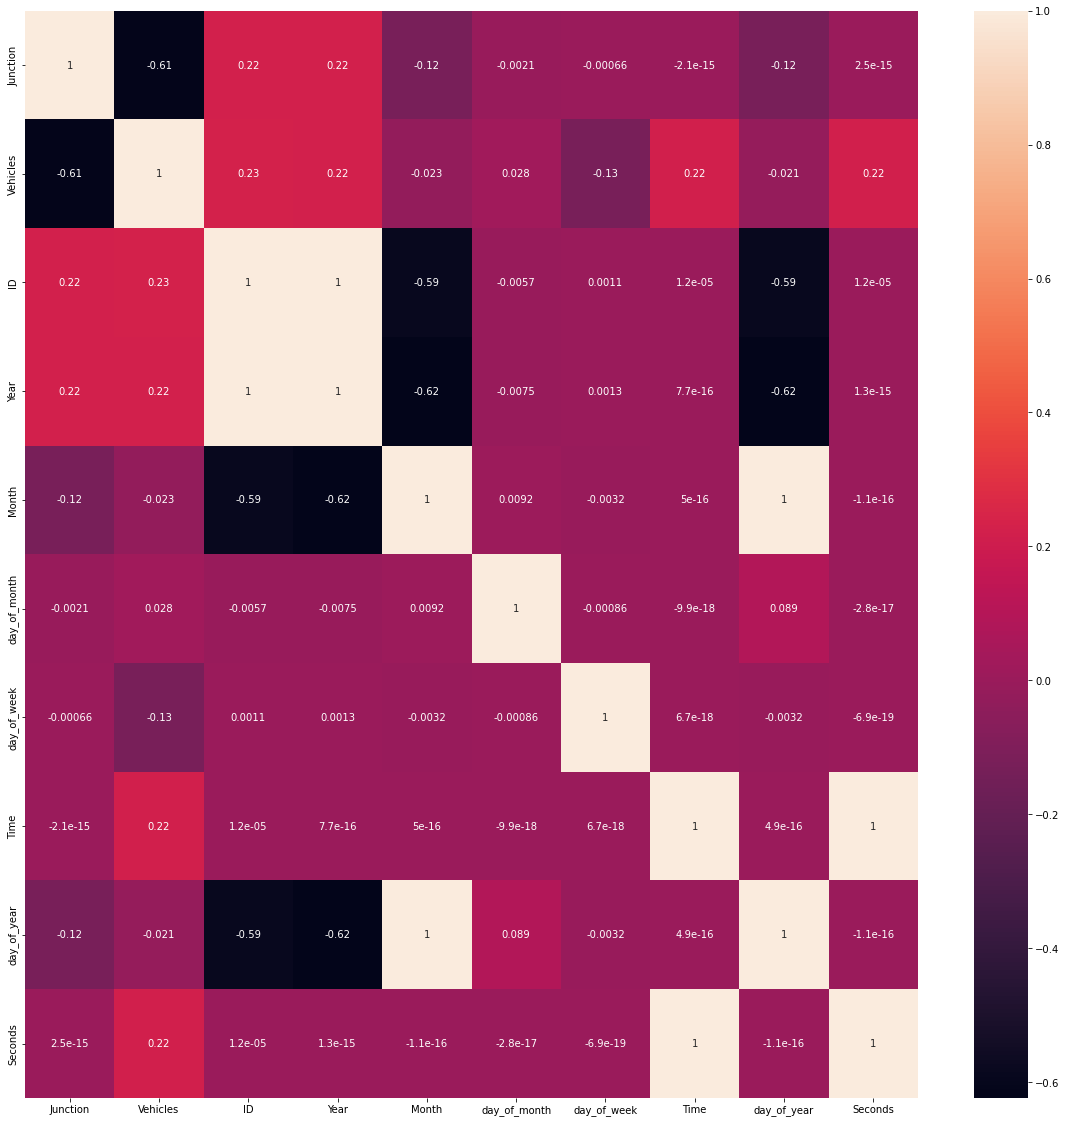

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

From The Correlation Heatmap Plotted above "Junction 1" had the highest correlation to the number of Vehicles while day of year and Month had the lowest correlation to the target.

### Extracting and Visualizing Total Vehicular Movement for each Junctions

In [55]:
df_junction = df.groupby(["Junction"])["Vehicles"].sum().reset_index(name = "Total_Vehicles")
df_junction

,Junction,Total_Vehicles
0,1,657412
1,2,207983
2,3,199823
3,4,31501


<AxesSubplot:title={'center':'Vehicular Movement By Junctions'}, xlabel='Junction', ylabel='Total Vehicles'>

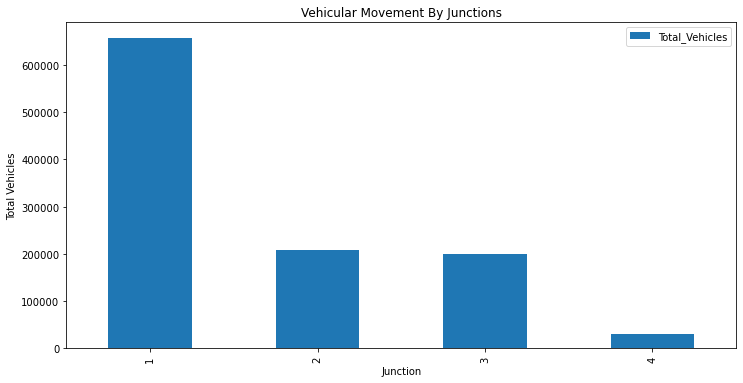

In [56]:
## Using Bar Chart to visualize vehicular movement per Junctions
df_junction.plot (x="Junction", y= "Total_Vehicles",
        kind="bar",
        figsize=(12,6),
        title="Vehicular Movement By Junctions",
        xlabel = "Junction", 
        ylabel = "Total Vehicles"
)


From the Bar plot above, Junction 1 has the highest cummulative vehicular movement over the date under consideration. Junction 4 on the other hand had very little vehicle movement in compare to others due to the fact that it came at later date of the period under consideration.

### Using a time series chart (Line Chart) to visualize vehicular movement volume for each junction for the duration under review

In [57]:
df_date = df.pivot_table(index = 'Date', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_date.head()

Junction,1,2,3,4
Date,,,,
2015-11-01,327.0,133.0,136.0,NaN
2015-11-02,546.0,197.0,166.0,NaN
2015-11-03,544.0,217.0,150.0,NaN
2015-11-04,498.0,199.0,121.0,NaN
2015-11-05,464.0,200.0,106.0,NaN


<AxesSubplot:xlabel='Date'>

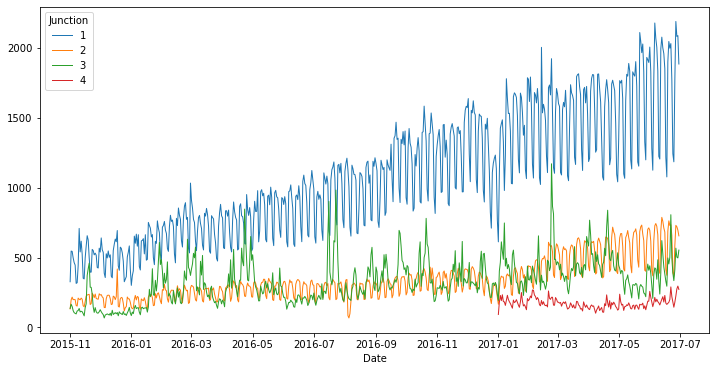

In [58]:
df_date.plot(kind='line', linewidth=1.0, figsize=(12, 6))

Line graph showed constant growing rate of vehicular movement for Junction 1, Other Junctions experienced Fluctuating but constant vehicular flow over the period in consideration

In [59]:
df_month = df.pivot_table(index = 'Month', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_month

Junction,1,2,3,4
Month,,,,
1,61379.0,16618.0,19165.0,5578.0
2,62929.0,19881.0,21294.0,5564.0
3,69326.0,23931.0,21978.0,4931.0
4,67486.0,24247.0,27063.0,4454.0
5,77227.0,27326.0,18861.0,4877.0
6,79314.0,27064.0,18727.0,6097.0
7,29111.0,8582.0,11049.0,NaN
8,31185.0,8237.0,9540.0,NaN
9,34374.0,9065.0,11954.0,NaN


<AxesSubplot:xlabel='Month'>

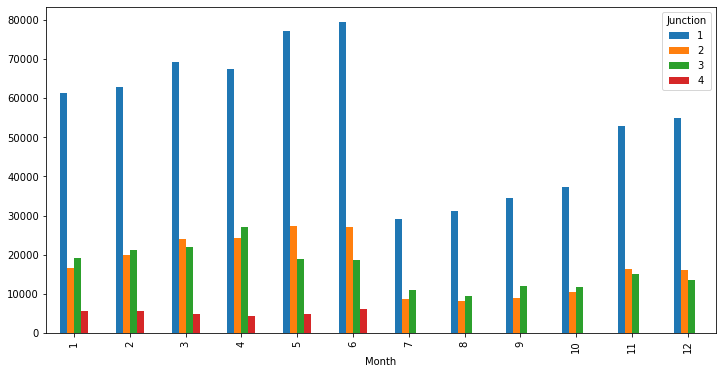

In [60]:
df_month.plot(kind='bar', linewidth=1.0, figsize=(12, 6))

The Visualization showed a comparative analysis of cummulative traffic movement over the month of the period in review for the junctions. With the Exception of Junction 4 which had recording for just the first half of the year, there seems to be rising case of traffic across all junctions where the traffic dropped and start rising again.

### Using a bar plot to compare rate of vehicular movement with year for each junction

In [61]:
df_year = df.pivot_table(index = 'Year', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_year

Junction,1,2,3,4
Year,,,,
2015,30223.0,12226.0,8103.0,NaN
2016,345098.0,103050.0,115440.0,NaN
2017,282091.0,92707.0,76280.0,31501.0


<AxesSubplot:xlabel='Year'>

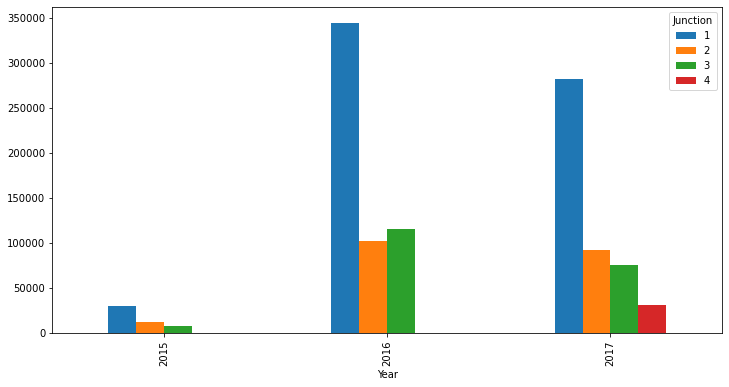

In [62]:
df_year.plot(kind='bar', linewidth=1.0, figsize=(12, 6))

The Year Bar Plot showed a sharp increase in Traffic Movement for Junction 1 through 3 for 2016 as compared to 2015 which dropped for 2017 on the addition of junction 4.

### Visualizing Daily Traffic situation for each junctions

In [63]:
df_day = df.pivot_table(index = 'day_of_month', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_day

Junction,1,2,3,4
day_of_month,,,,
1,20535,6667,6474,1000
2,21535,6761,6752,1169
3,21192,6695,6327,1135
4,20348,6200,6080,1109
5,20567,6266,6189,1145
6,21592,6673,5834,1080
7,21035,6870,5797,1048
8,21695,7002,5500,983
9,22154,6885,6329,1063


<AxesSubplot:xlabel='day_of_month'>

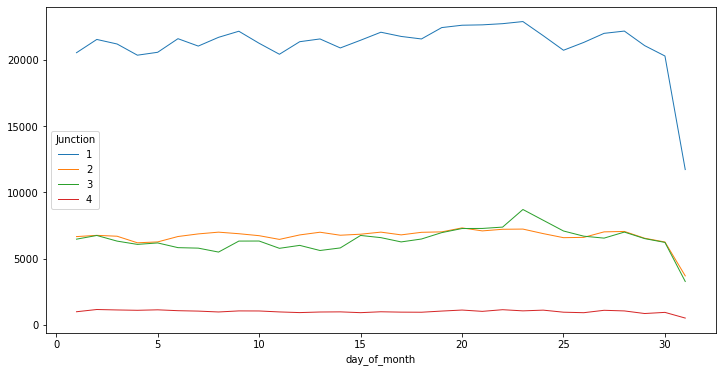

In [64]:
df_day.plot(kind='line', linewidth=1.0, figsize=(12, 6))

The Month_Daily Traffic Visualization Potrayed a Steady flow until towards the end of the month where there is a sharp drop for all junctions 

### Day of The Week Traffic Analysis and Visualization

In [65]:
df_day1 = df.pivot_table(index = 'day_of_week', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_day1

Junction,1,2,3,4
day_of_week,,,,
0,103156,31798,28517,4661
1,106991,34571,27670,4943
2,106201,34278,27992,4760
3,104994,33463,29857,4939
4,98224,31200,29965,4560
5,70407,21492,30128,3928
6,67439,21181,25694,3710


<AxesSubplot:xlabel='day_of_week'>

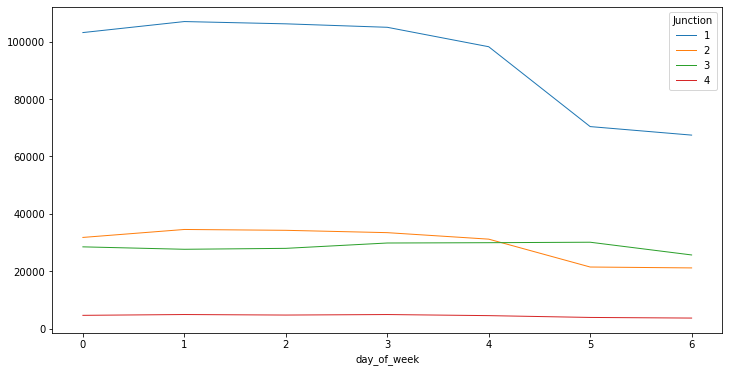

In [66]:
df_day1.plot(kind='line', linewidth=1.0, figsize=(12, 6))

Traffic flow was observed to be steady across all junctions until Fourth day (Thursday) where there is a sharp drop of movement till rest of the week

### Visualizing Hourly Vehicular Movement for each Junction

In [67]:
df_time = df.pivot_table(index = 'Time', columns = 'Junction', values = 'Vehicles', aggfunc = sum)
df_time

Junction,1,2,3,4
Time,,,,
0,27809,9519,8618,1253
1,23807,8582,5993,1026
2,20616,7901,4898,876
3,17894,6973,4120,782
4,15598,6080,3635,698
5,14633,5604,3457,714
6,15857,5632,3792,744
7,17952,6119,4591,818
8,19903,6533,5507,945


<AxesSubplot:xlabel='Time'>

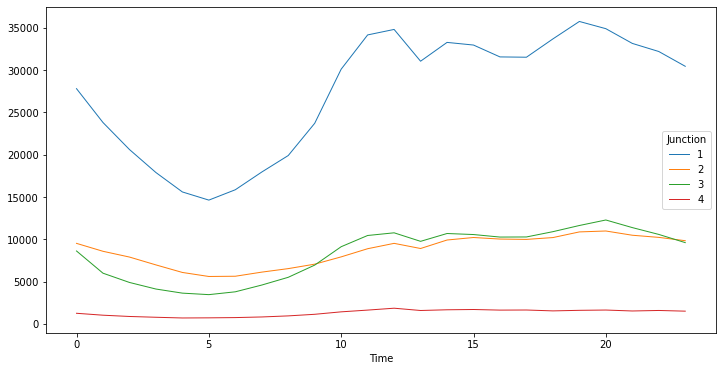

In [68]:
df_time.plot(kind='line', linewidth=1.0, figsize=(12, 6))

The Hourly Analysis Shows Least Traffic situation at early period of the day, with peak traffic experienced at the later hour of the day

## Bivariate Analysis On Junctions

In [69]:
def show_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Showing the Distribution of Vehicle Data  in Junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

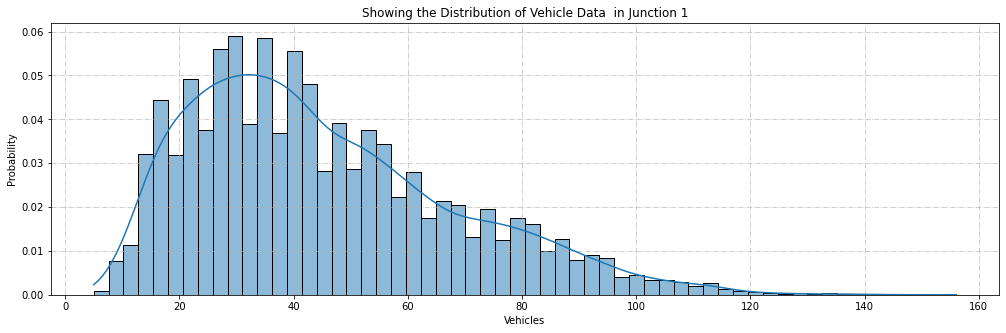

In [70]:
show_hist(1)

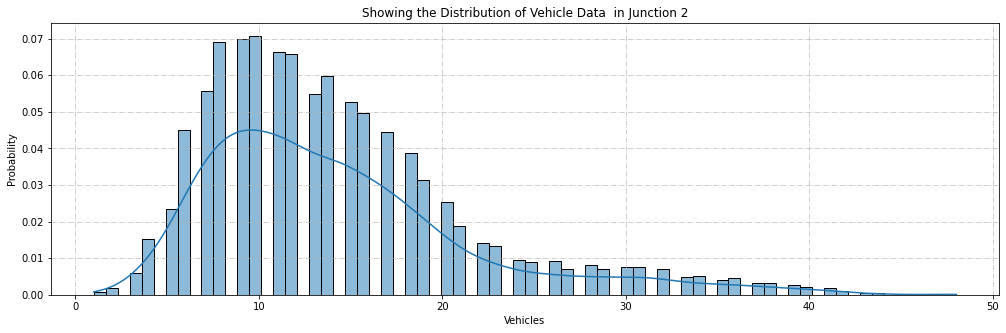

In [71]:
show_hist(2)

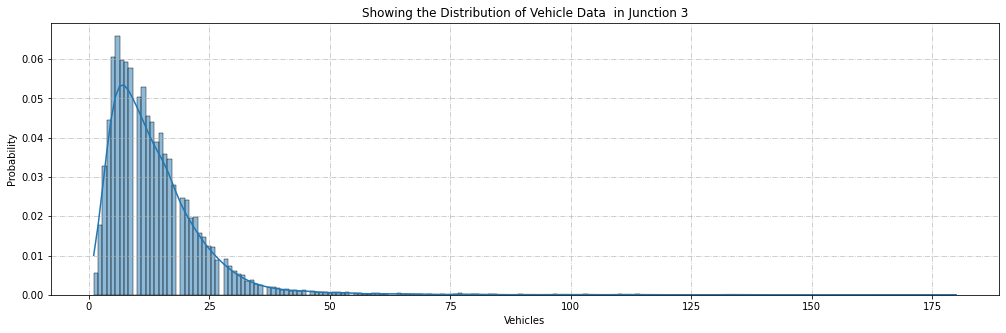

In [72]:
show_hist(3)

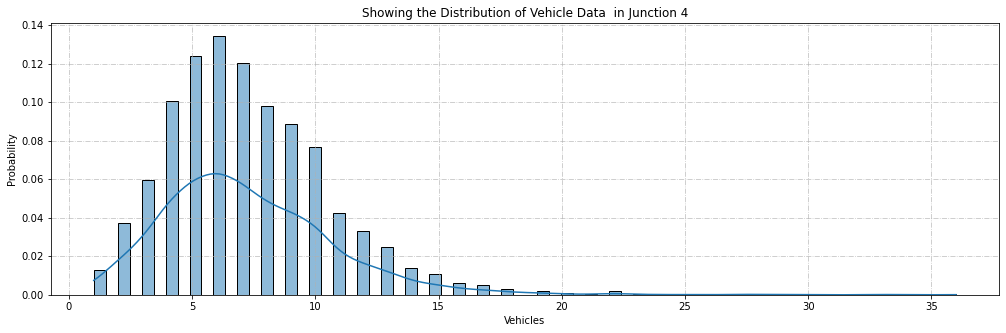

In [73]:
show_hist(4)

In [74]:
def td_time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1).reset_index()
    end = data.tail(1).reset_index()
    ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

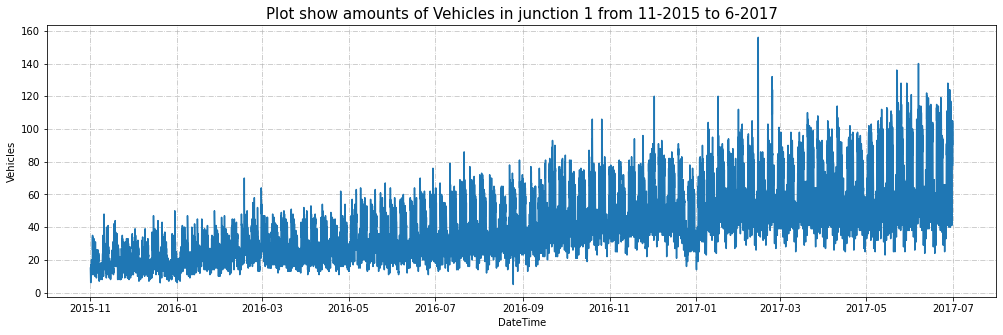

In [75]:
td_time_series_plot(1)

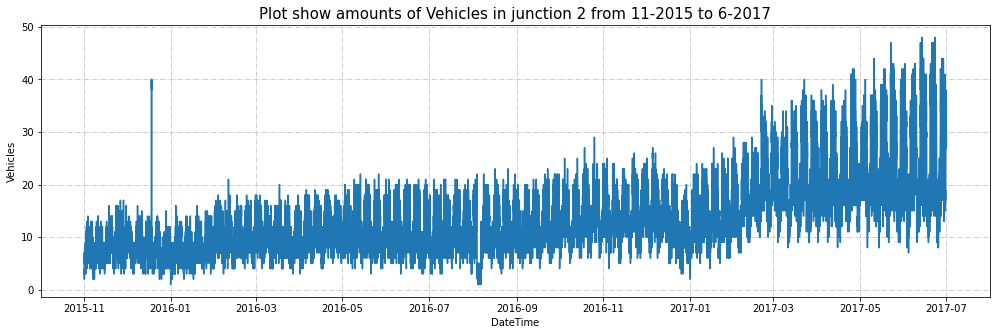

In [76]:
td_time_series_plot(2)

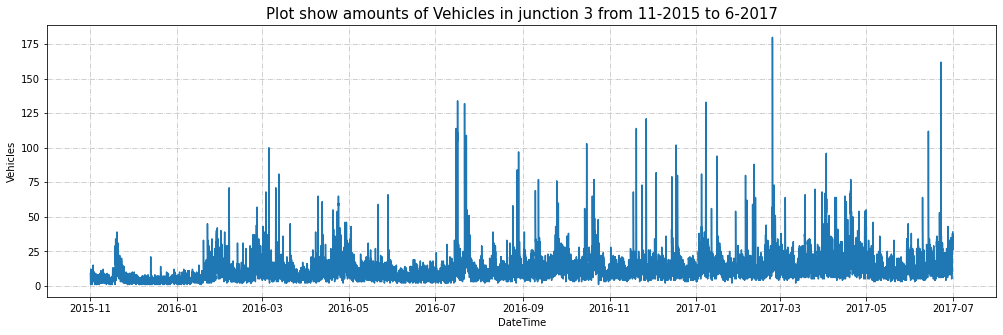

In [77]:
td_time_series_plot(3)

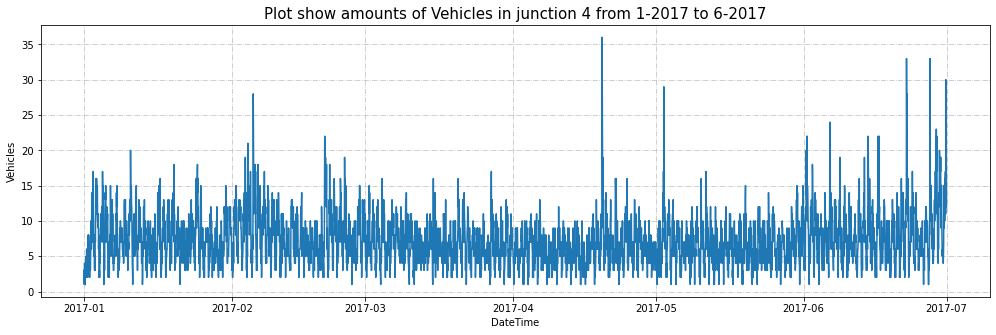

In [78]:
td_time_series_plot(4)

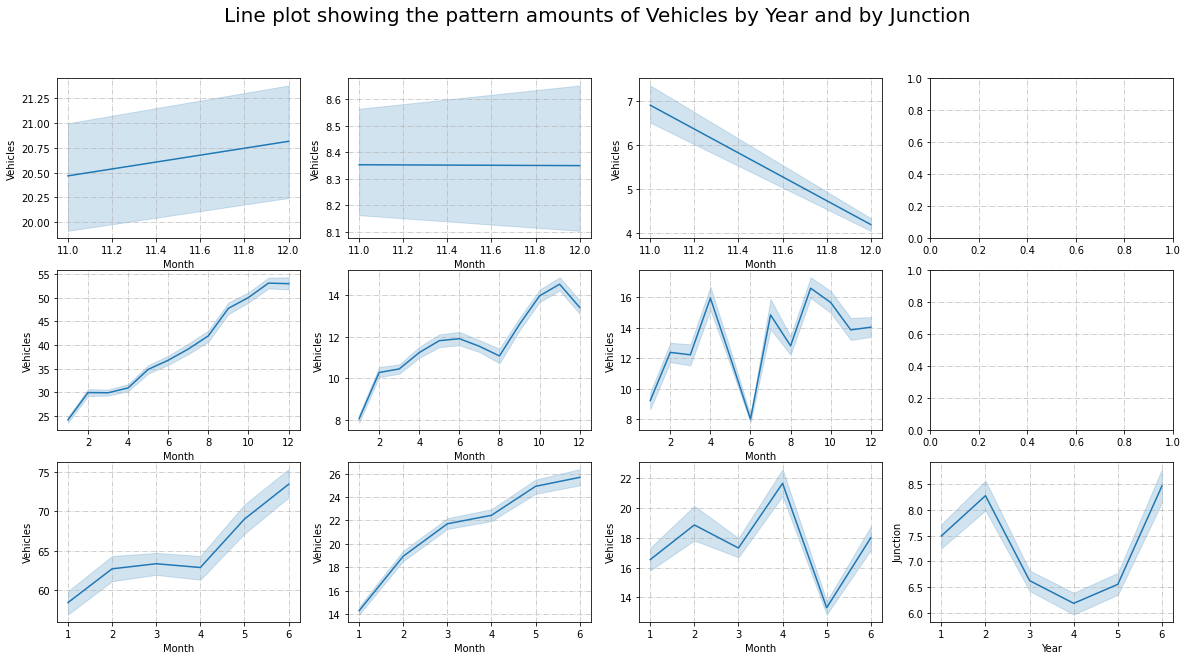

In [79]:
f, ax = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
    for j, junction in enumerate(range(1, 5)):
        sns.lineplot(data=df[(df.Junction == junction) & (df.Year == year)], x='Month', y='Vehicles', ax=ax[i, j])
        ax[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Line plot showing the pattern amounts of Vehicles by Year and by Junction', fontsize=20)
plt.show()

Yearly, there has been an upward trend for all junctions except for the fourth junction. As we already established above that the fourth junction has limited data and that don't span over a year.

We can see that there is an influx in the first and second junctions around June. I presume this may be due to summer break and activities around the same.

Monthly, throughout all the dates there is a good consistency in data.

For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

In [80]:
def get_list_traffic(dataf, drop=[]):
  # drop DateTime in data
    for i in drop:
        try:
            dataf.drop(drop, axis=1, inplace=True)
        except:
            print(f"{i} doesn't has in data")
      # create a list of dataframe has the data in that junction and remove the junction identify
    dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
    return dataf

In [81]:
df1= df.set_index('DateTime')
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00+00:00 to 2017-06-30 23:00:00+00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Junction      48120 non-null  int64 
 1   Vehicles      48120 non-null  int64 
 2   ID            48120 non-null  int64 
 3   Year          48120 non-null  int64 
 4   Month         48120 non-null  int64 
 5   day_of_month  48120 non-null  int64 
 6   day_of_week   48120 non-null  int64 
 7   Date          48120 non-null  object
 8   Time          48120 non-null  int64 
 9   day_of_year   48120 non-null  int64 
 10  Seconds       48120 non-null  int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 4.2+ MB


In [82]:
traffic = get_list_traffic(df1)
for i in traffic:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, ID, Year, Month, day_of_month, day_of_week, Date, Time, day_of_year, Seconds]
Index: []
                           Vehicles           ID  Year  Month  day_of_month  \
DateTime                                                                      
2015-11-01 00:00:00+00:00        15  20151101001  2015     11             1   

                           day_of_week        Date  Time  day_of_year  Seconds  
DateTime                                                                        
2015-11-01 00:00:00+00:00            6  2015-11-01     0          305        0  
                           Vehicles           ID  Year  Month  day_of_month  \
DateTime                                                                      
2015-11-01 00:00:00+00:00         6  20151101002  2015     11             1   

                           day_of_week        Date  Time  day_of_year  Seconds  
DateTime                                                                    

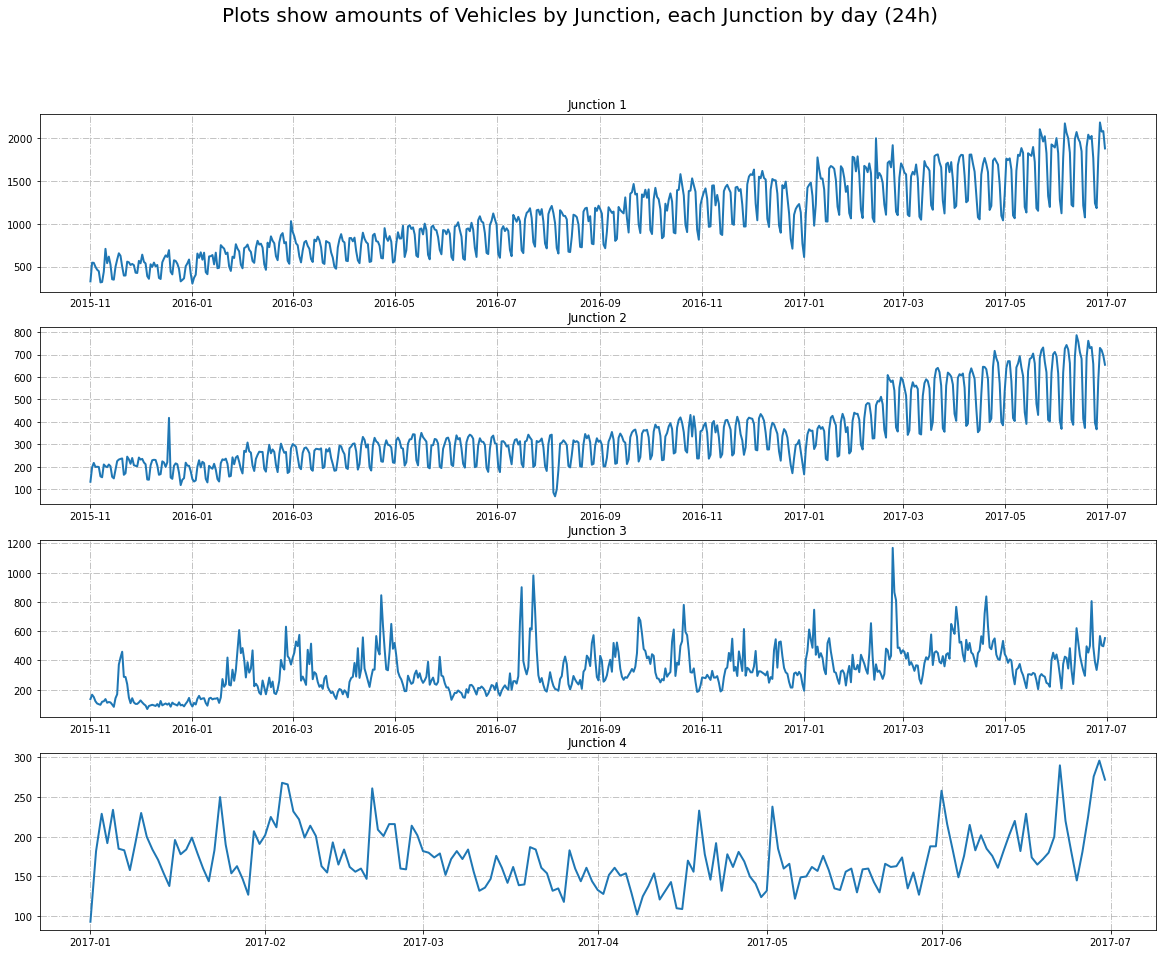

In [83]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(traffic[i + 1].resample('D').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (24h)', fontsize=20);

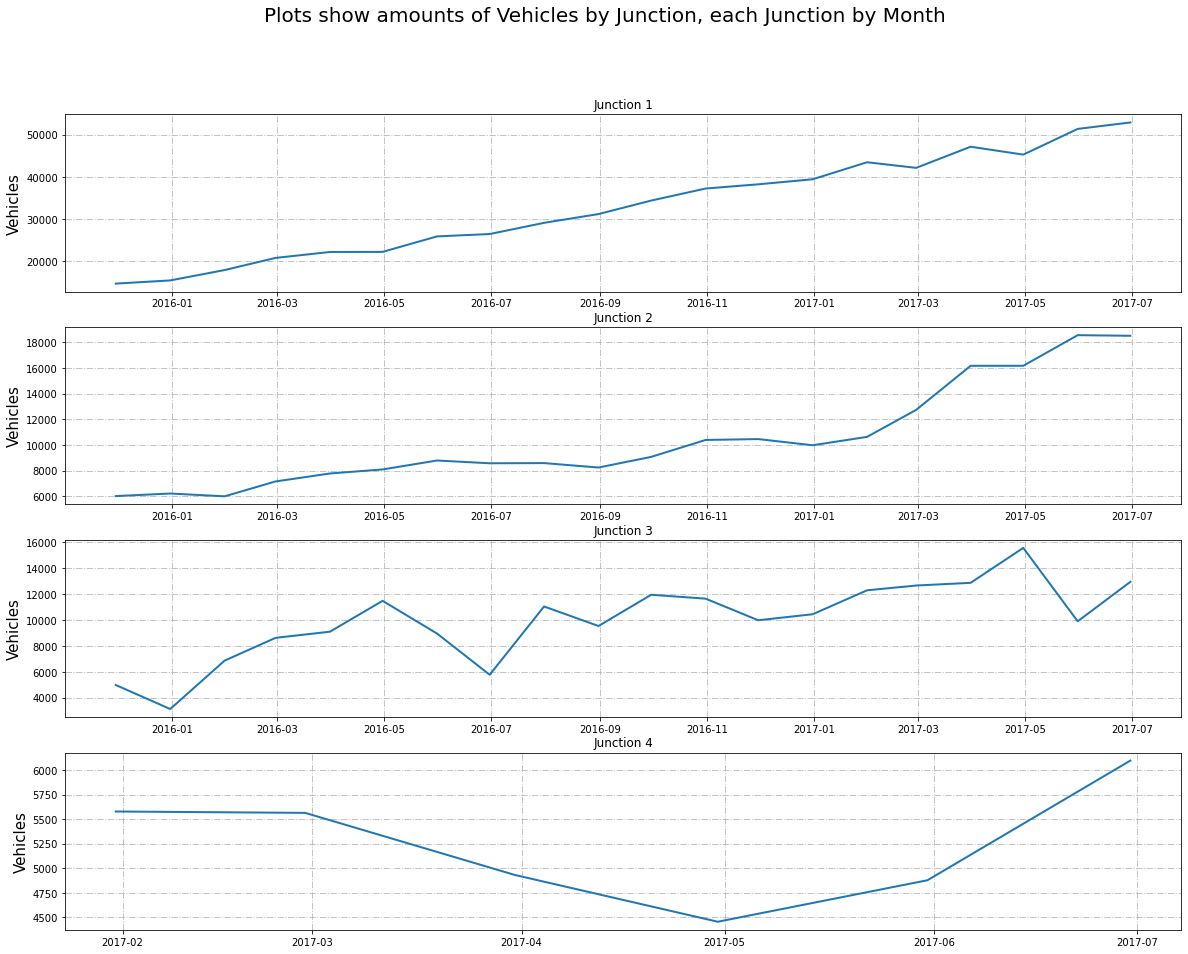

In [84]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(traffic[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_ylabel('Vehicles', fontsize=15)
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by Month', fontsize=20);

It can be seen here that the first junction is visibly having an upward trend.
The data for the fourth junction is sparse starting only after 2017
Seasonality is not evident from the above plot, So we must explore datetime composition to figure out more about it.

### COMMENT ON THE ABOVE DATA ANALYSIS

 - There has been upward trend of vehicles yearly in all the four junctions with junction 1 having the highest upward trend
 
 - We notice an increase in the first and third juction around the month of June, this might be due to summer activities that happen around that time.
 
 - We notice a daily increased Vehicular movement all the junctions except junction four which started recording data from January 2017.
 
 - With the exception of junction 4, We notice the data increasing during the morning time, around 6am, stays steady throughout the afternoon, and decreases during the evening time around 8pm.
 
 - We also notice that we have less traffic during the weekend and steady traffic during the weekdays.

 - Junction 4 was created to reduce the overall traffic situation on the axis which seemed to work.

 

In [85]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,day_of_month,day_of_week,Date,Time,day_of_year,Seconds
0,2015-11-01 00:00:00+00:00,1,15,20151101001,2015,11,1,6,2015-11-01,0,305,0
1,2015-11-01 01:00:00+00:00,1,13,20151101011,2015,11,1,6,2015-11-01,1,305,3600
2,2015-11-01 02:00:00+00:00,1,10,20151101021,2015,11,1,6,2015-11-01,2,305,7200
3,2015-11-01 03:00:00+00:00,1,7,20151101031,2015,11,1,6,2015-11-01,3,305,10800
4,2015-11-01 04:00:00+00:00,1,9,20151101041,2015,11,1,6,2015-11-01,4,305,14400


### Exporting Clean Processed Data

In [87]:
df.to_csv('traffic_clean.csv')